12.755102040816332
kz_preopen : 0.0129
kz_open : 0.0129


(0.0, 2.0)

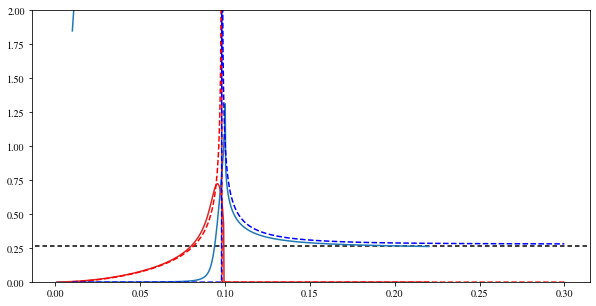

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from util.tools_dispersion import open_disp_file,find_max_gamma,verification_dispersion,precedent_openfile
import os


# %constants
m_e=9e-31 
m_p=1.67e-27 
eps0=8.82e-12 
e=1.6e-19 

# %inputs
M=131*m_p # %Xenon mass
n_0=5e16 
E_0=1e4 
B_0=200e-4 
u_0=E_0/B_0 
T_e=10 # % In volts

# %Physics parameters
lambda_D=(eps0*e*T_e/(n_0*e**2))**0.5
u_B=(e*T_e/M)**0.5
omega_pi=(n_0*e**2/(M*eps0))**0.5
omega_ce=e*B_0/m_e 

# %Normalized parameters
u_norm=u_0/u_B 
k_r=0.0129

A=(M/m_e)*k_r**2/u_norm**2 
b=(M/m_e)*omega_pi**2/omega_ce**2 
k_theta=np.linspace(0.01,0.3,1000)


# %Solution and plot
omega = np.zeros(len(k_theta),dtype=complex)

print(b)

for ind in range(len(k_theta)):
    omega[ind] = (np.complex(1/(1+b-A/k_theta[ind]**4)))**0.5

    
    
plt.figure(figsize=((10,5)))


sol = np.sqrt(1/(1+(M/m_e*omega_pi**2/omega_ce**2)))
plt.axhline(y=sol, linestyle=(3,(3,2)),color="black") 

kymin = 0.001
kymax = 0.22
pas = 0.0002383025027203481
kappa = np.arange(0.001,0.2200,0.0002383025027203481)
Nkys = len(kappa)

kappa = np.arange(kymin,kymax,pas)

current = os.getcwd()
path = current + "/dispersion_data/change_n/{:}/".format(5e16)
omegax, gammax, kz = precedent_openfile(k_r,Nkys=Nkys, path=path)

plt.plot(kappa,omegax,c='tab:blue')
plt.plot(kappa,gammax,c='tab:red') 

plt.plot(k_theta,np.imag(omega),"--",c='r')
plt.plot(k_theta,np.real(omega),"--",c='b') 
# plt.axvline(x=(A/(b+1))**0.25, linestyle=(3,(3,2)),color="black") 
plt.plot(k_theta, k_theta*u_norm)
plt.ylim(0,2)

In [47]:
from util.parameters import PlasmaParameters
from astropy import units as u
prt_base=PlasmaParameters(plasmaDensity=5e16*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=2e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)
# print(prt_base.ionPlasmaFrequency,(5e16*(1.6e-19)**2/(M*eps0))**0.5)

# print((M/m_e)**0.5)
# print(u_0,u_B,u_0/u_B  )
print((M/m_e)**0.5/u_norm)

2.666666666666667
